# <p style="padding:10px;background-color:#808080;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:140%;text-align:center;overflow:hidden;font-weight:500">Introduction</p>

<p style="text-align:center; ">

</p>

<p style="text-align:justify; ">
<B>HR Analytics</B> 
is a field of analytics that refers to implementing an analytics process in an organisation's human resources department in the hope of improving employee performance and return on investment. HR Analytics does more than just collect data about employee efficiency. Instead, its purpose is to provide an understanding of each process by collecting data and making relevant decisions about how to use it to improve these processes. 
    
    
<b> Employee Retention </b> measures how many workers have been retained an organization and is a common metric companies use to assess their performance. There are often many reasons why employees are retained in an organization.
 
 <B> In this notebook</B> , I will explore a dataset created by IBM data scientists to analyze the factors that lead to employee Retention. The data consists of nearly 1,500 current and former employees with information related to their job satisfaction, work life balance, experience, salary etc. First, we will do EDA based on some questions.  Then we will perform some feature engineering. Finally, we will build 5 machine learning classification model for predicting the Retention.
    
    
    
</p>  




<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#808080;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;overflow:hidden;font-weight:500">Table Of Contents</p>
    
    
        
|No  | Contents 
|:---| :---    
|1   | [<font color="#682F2F"> Importing Libraries</font>](#1)                   
|2   | [<font color="#682F2F"> Basic Exploration </font>](#2)                         
|3   | [<font color="#682F2F"> Exploratory Data Analysis (EDA) </font>](#3)               
|4   | [<font color="#682F2F"> Feature Engineering</font>](#4)                       
|5   | [<font color="#682F2F"> Model Building </font>](#5)      


<a id="1"></a>
# <p style="padding:10px;background-color:#808080;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:120%;text-align:center;overflow:hidden;font-weight:500">Importing Libraries</p>


In [1]:

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score




<a id="2"></a>
# <p style="padding:10px;background-color:#808080;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:120%;text-align:center;overflow:hidden;font-weight:500">Basic Exploration </p>

In [2]:
data=pd.read_csv('../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Taking a glance at the datatypes**

In [4]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
data.describe(include=object).T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [7]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
target_map = {'Yes':0, 'No':1}
data['Retention'] = data['Attrition'].apply(lambda x: target_map[x])
data.head()
data=data.drop(columns='Attrition')

<a id="3"></a>

# <p style="padding:10px;background-color:#808080;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:120%;text-align:center;overflow:hidden;font-weight:500">Exploratory Data Analysis (EDA)</p>


In [10]:
def plot_distribution(var_select, bin_size) : 
# Calculate the correlation coefficient between the new variable and the target
    corr = data['Retention'].corr(data[var_select])
    corr = np.round(corr,3)
    tmp1 = Retention[var_select]
    tmp2 = no_Retention[var_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['Yes_retention', 'No_retention']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, curve_type='kde', bin_size = bin_size)
    
    fig['layout'].update(title = var_select+' '+'(corr target ='+ str(corr)+')')

    py.iplot(fig, filename = 'Density plot')

In [11]:
def barplot(var_select, x_no_numeric) :
    tmp1 = data[(data['Retention'] != 0)]
    tmp2 = data[(data['Retention'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(data[var_select],data['Retention']), )
    tmp3['Attr%'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100
    if x_no_numeric == True  : 
        tmp3 = tmp3.sort_values(1, ascending = False)

    color=['#B9C0C9','yellow' ]
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        name='Yes_Retention', marker=dict(
        color='yellow',
        line=dict(color='#000000',width=1)))

    
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        name='No_Retention', opacity = 0.9, marker=dict(
        color='#B9C0C9',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['Attr%'],
        yaxis = 'y2',
        name='% Retention', opacity = 0.9, marker=dict(
        color='darkblue',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% Retention'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

In [12]:
def plot_pie(var_select) :
    
    colors = ['#B9C0C9', '#CED2FD', '#ceb0ff', 'lightskyblue', 'lightgrey', '#EAB9FC', 'cyan', '#DDC8FE']
    trace1 = go.Pie(values  = Retention[var_select].value_counts().values.tolist(),
                    labels  = Retention[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Retention employes",
                    marker  = dict(colors = colors, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = no_Retention[var_select].value_counts().values.tolist(),
                    labels  = no_Retention[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), 
                    hoverinfo = "label+percent+name",
                    marker  = dict(colors = colors, line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Non Retention employes" )

    layout = go.Layout(dict(title = var_select + " distribution in employees Retention ",
                            annotations = [dict(text = "Yes_Retention",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "No_Retention",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

## <i> Distribution of Retention

In [13]:
Retention = data[(data['Retention'] != 0)]
no_Retention = data[(data['Retention'] == 0)]

trace = go.Pie(labels = ['No_Retention', 'Yes_Retention'], values = data['Retention'].value_counts(), 
               textfont=dict(size=15),
               marker=dict(colors=['#B9C0C9','yellow'], 
               line=dict(color='#000000', width=1.5)))
layout = dict(title =  'Distribution of Retention variable')          
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

## <i> Gender Distribution of Employee Retention

In [14]:
plot_pie('Gender')
barplot('Gender', False)

 ## <i> what is effect of age on Retention ?

In [15]:
barplot('Age', False)

**Observation** As seen in the chart above, the Retention is maximum between the age groups 28-32. The Retention rate keeps on falling with increasing age, as people look after stability in their jobs at these point of times. Also at a very younger age, i.e. from 18-20, the chances of an employee leaving the organization is far more- since they are exploring at that point of time. It reaches a break even point at the age of 21

## <i> Is income the main factor towards employee Retention?

In [16]:
plot_df=data.sort_values(by="Retention")
fig=px.histogram(plot_df, x='MonthlyIncome', color='Retention', 
                 opacity=0.8, histnorm='density', barmode='overlay', marginal='box',
                 color_discrete_map={'Yes': '#B9C0C9','No': '#CDBBA7'})
fig.update_layout(title_text='Distribution of Monthly Income by Retention Status',
                  xaxis_title='Monthly Income, $', yaxis_title='Density',font_color='#28221D',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', legend_traceorder='reversed')
fig.show()

**Observation** As seen in the above chart, the Retention rate is evidently high at very low income levels- less than 5k monthly. This decreases further- but a minor spike is noticed aorund 10k- indicating the middle class liveliood. They tend to shift towards a better standard of living, and hence move to a different job. When the monthly income is pretty decent, the chances of an employee leaving the organization is low- as seen by the flat line

## <i> Does the Department of work impact Retention?

In [17]:
plot_pie('Department') 
barplot('Department',True)

**Observations** This data comprises of only 3 major departments- among which Sales department has the highest Retention rates (25.84%), followed by the Human Resource Department (19.05%). Research and Development has the least Retention rates, that suggests the stability and content of the department as can be seen from the chart above(13.83%).

## <i> How does the environment satisfaction impact Retention?

In [18]:
sats_att=data.groupby(['EnvironmentSatisfaction','Retention']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(sats_att,x='EnvironmentSatisfaction',y='Counts',color='Retention',title='Environment Satisfaction level Counts of People in an Organization')

In [19]:
#plot_pie('EnvironmentSatisfaction')
barplot('EnvironmentSatisfaction',False)

**Observation** In the satisfaction Level 1-2, the chances of peope leaving the organization slightly decreases. This is indicative of the better hopes with which people stay in an organization. However, as we move from 2-3, people tend to move on to get better opportunities and experiences. The Retention rate is almost stagnant for the higher satisfaction levels.

## <i> How Is Retention Affected by business travels?

In [20]:
barplot('BusinessTravel', False)

**Observation** Most employees who travel rarely don't leave the company. From the plot we can tell, sending employees on business travels or not doesn't really make much of a difference and doesn't have a significant effect on Retention. 
So the Business Travel is not one of the main factors causing Retention but who travel frequently have biggest percentage

## <i> what is effect of the distance from home on Retention ?

In [21]:
barplot('DistanceFromHome', False)

**Observation:** Most of the people who leave the company are located more than 11-12 km away from the company

## <i> How does self Job Satisfaction impact the Retention?

In [22]:
jsats_att=data.groupby(['JobSatisfaction','Retention']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(jsats_att,x='JobSatisfaction',y='Counts',color='Retention',title='Job Satisfaction level Counts of People in an Organization')

In [23]:
#plot_pie('JobSatisfaction')
barplot('JobSatisfaction',False)

**Observation** With an increasing job satisfaction, the Retention rates decrease as can be seen in the chart above. Also from range 1-2 range we can infer (as seen above in Environment Satisfaction), the Retention level falls, but raises from 2-3, where the people tend to coose better opportunities.

## <i> Does company stocks for employees impact Retention?

In [24]:
stock_att=data.groupby(['StockOptionLevel','Retention']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.bar(stock_att,x='StockOptionLevel',y='Counts',color='Retention',title='Stock facilities level wise People in an Organization')

**Observation** The tendency of employees to leave the organization is much more when the stock availing options are limited. Since the stocks constitute to a huge amount of money while staying for a few years, people do not want to lose that opportunity. People with very limited/no stcok options have a freedom to leave the organization at will.

## <i> How does Work Life Balance impact the overall Retention rates?

In [25]:
barplot('WorkLifeBalance', False)

**Observation** People with poor levels of Work life balance have adjusted themselves to their jobs, but as seen for the above parameters with a better work life score, people are more accustomed to the better life and want to go for an Retention more. But this trend perishes when the work life balance is really good, and people are satisfied with the work they are doing

## <i> How does work experience affect Retention?

In [26]:
ncwrd_att=data.groupby(['NumCompaniesWorked','Retention']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(ncwrd_att,x='NumCompaniesWorked',y='Counts',color='Retention',title='Work Experience level Counts of People in an Organization')

**Observations** As seen from the chart above, clearly, employees who started their career with the company- or have switched to the company in the initial years of their career, have a higher chances of leaving the organization to a different company. People who have gained much experience- working in multiple companies tend to stay in the company they join.

## <i> How does work duration in current role impact Retention?

In [27]:
barplot('YearsInCurrentRole', False)

**Observation** We have seen people are more prone to leave the organization in the starting years on their role. When people are in the same role for a long period of time, they tend to stay longer for moving in an upward role.

## <i> Does hike percentage impact Retention?

In [28]:
barplot('PercentSalaryHike', False)

**Observation** Higher hikes motivate people to work better, and stay in the organization. Hence we see the chances of an employee leaving the organization where the hike is lower, is much more than a company that gives a good hike.

## <i> Are managers a reason of people resigning ?

In [29]:
px.box(data, x="YearsAtCompany")

**Observation:** Most employees remain in the company for 3-9 years with median being 5 years. Is it for the managers? Let's try to find out.

In [30]:
man_att=data.groupby(['YearsWithCurrManager','Retention']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(man_att,x='YearsWithCurrManager',y='Counts',color='Retention',title='Count of people spending years with a Manager in an Organization')

In [31]:
barplot('YearsWithCurrManager', False)

**Observation** Employees have a tendancy to switch jobs during within first year. At an average span of 2  & 7 years they tend to go for a change. But when the relative time spend with a manager is very high- people are satisfied with their work. Hence the chances of an employee resigning then is significantly low.

<a id="4"></a>
# <p style="padding:10px;background-color:#808080;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:120%;text-align:center;overflow:hidden;font-weight:500">Feature Engineering</p>

In [32]:
for column in data.columns:
    print(f"{column}: Number of unique values {data[column].nunique()}")
    print("==========================================================")

Age: Number of unique values 43
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of unique values 2
RelationshipSatisfaction

**Observation** We notice that 'EmployeeCount', 'Over18' and 'StandardHours' have only one unique values and 'EmployeeNumber' has 1470 unique values. This features aren't useful for us, So we are going to drop those columns.

In [33]:
#data.Retention.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)
data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Retention
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,0
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,1
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,1
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,1


<AxesSubplot:>

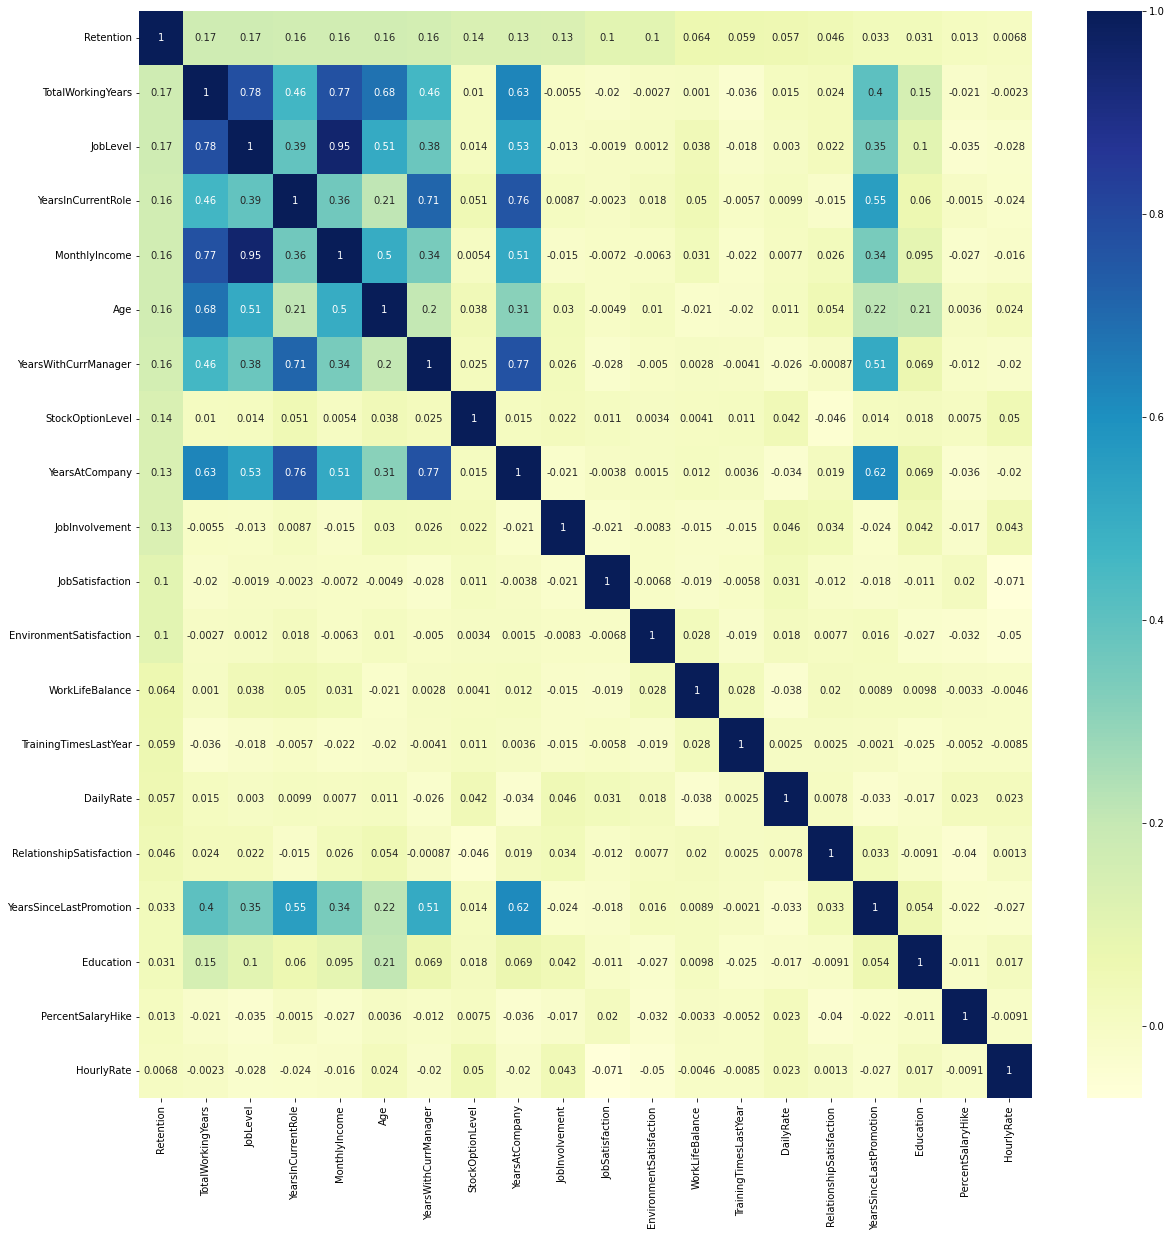

In [34]:
col = data.corr().nlargest(20, "Retention").Retention.index
plt.figure(figsize=(20, 20))
sns.heatmap(data[col].corr(), annot=True, cmap="YlGnBu", annot_kws={"size":10})

In [35]:
# Transform categorical data into dummies
dummy_col = [column for column in data.drop('Retention', axis=1).columns if data[column].nunique() < 20]
data = pd.get_dummies(data, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 136 entries, Age to YearsWithCurrManager_17
dtypes: int64(9), uint8(127)
memory usage: 285.8 KB


In [36]:
print(data.shape)

# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(data.shape)

(1470, 136)
(1470, 136)


<a id="5"></a>
# <p style="padding:10px;background-color:#808080;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:120%;text-align:center;overflow:hidden;font-weight:500">Model Building</p>

In [37]:
X = data.drop('Retention', axis=1)
y = data.Retention
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [38]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test= pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,...,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17
0,0.356686,-0.553086,-0.045318,1.117447,1.501157,-0.108392,1.148216,1.888092,2.087912,-1.551543,...,-0.29426,-0.208831,-0.137156,-0.10395,-0.121626,9.205976,-0.069877,-0.054074,-0.031189,-0.04413
1,0.577124,-1.570503,2.383430,-0.467191,-0.479160,-0.703132,0.624901,-1.010153,-0.478947,0.644520,...,-0.29426,-0.208831,-0.137156,-0.10395,-0.121626,-0.108625,-0.069877,-0.054074,-0.031189,-0.04413
2,-0.414848,0.564817,-0.166755,1.117447,-0.893381,0.969434,-1.075873,-0.839668,-0.478947,-1.551543,...,-0.29426,-0.208831,-0.137156,-0.10395,-0.121626,-0.108625,-0.069877,-0.054074,-0.031189,-0.04413
3,-0.635286,-0.050658,1.290494,0.077528,-0.797016,1.046029,-1.075873,-0.839668,2.087912,-1.551543,...,-0.29426,-0.208831,-0.137156,-0.10395,-0.121626,-0.108625,-0.069877,-0.054074,-0.031189,-0.04413
4,0.026028,1.572185,-0.652505,-0.566231,-0.753018,-1.319274,-0.421729,-0.157728,-0.478947,0.644520,...,-0.29426,-0.208831,-0.137156,-0.10395,-0.121626,-0.108625,-0.069877,-0.054074,-0.031189,-0.04413


In [39]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    #print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("\n TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    #print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

## <i> Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train, y_train)

evaluate(lr_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
ACCURACY SCORE: 0.9271
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.876033    0.933921  0.927114     0.904977      0.924582
recall       0.638554    0.982619  0.927114     0.810586      0.927114
f1-score     0.738676    0.957651  0.927114     0.848164      0.922326
support    166.000000  863.000000  0.927114  1029.000000   1029.000000

 TESTING RESULTS: 
ACCURACY SCORE: 0.8617
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.586207    0.903394  0.861678    0.744801      0.852328
recall      0.478873    0.935135  0.861678    0.707004      0.861678
f1-score    0.527132    0.918991  0.861678    0.723061      0.855902
support    71.000000  370.000000  0.861678  441.000000    441.000000


## <i> Random Forest

In [41]:
rf_clf = RandomForestClassifier(n_estimators=50, bootstrap=False)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
ACCURACY SCORE: 1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    166.0  863.0       1.0     1029.0        1029.0

 TESTING RESULTS: 
ACCURACY SCORE: 0.8594
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.714286    0.866667   0.85941    0.790476      0.842134
recall      0.211268    0.983784   0.85941    0.597526      0.859410
f1-score    0.326087    0.921519   0.85941    0.623803      0.825656
support    71.000000  370.000000   0.85941  441.000000    441.000000


## <i> SVM

In [42]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

evaluate(svm_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
ACCURACY SCORE: 0.9359
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.890625    0.942286   0.93586     0.916456      0.933952
recall       0.686747    0.983778   0.93586     0.835262      0.935860
f1-score     0.775510    0.962585   0.93586     0.869048      0.932406
support    166.000000  863.000000   0.93586  1029.000000   1029.000000

 TESTING RESULTS: 
ACCURACY SCORE: 0.8481
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.527778    0.910569  0.848073    0.719173      0.848941
recall      0.535211    0.908108  0.848073    0.721660      0.848073
f1-score    0.531469    0.909337  0.848073    0.720403      0.848501
support    71.000000  370.000000  0.848073  441.000000    441.000000


## <i> XGBoost

In [43]:
xgb_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                           colsample_bytree=0.8, gamma=1.5, learning_rate=0.05,
                           max_delta_step=0, max_depth=5, min_child_weight=7,
                           n_estimators=200, n_jobs=-1, nthread=None,
                           objective='binary:logistic', random_state=0, reg_alpha=0,
                           reg_lambda=1, scale_pos_weight=1, seed=None,
                           subsample=0.6)
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
ACCURACY SCORE: 0.9232
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.957895    0.919700  0.923226     0.938797      0.925862
recall       0.548193    0.995365  0.923226     0.771779      0.923226
f1-score     0.697318    0.956038  0.923226     0.826678      0.914301
support    166.000000  863.000000  0.923226  1029.000000   1029.000000

 TESTING RESULTS: 
ACCURACY SCORE: 0.8662
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.687500    0.880196  0.866213    0.783848      0.849172
recall      0.309859    0.972973  0.866213    0.641416      0.866213
f1-score    0.427184    0.924262  0.866213    0.675723      0.844234
support    71.000000  370.000000  0.866213  441.000000    441.000000


## <i> CatBoost

In [44]:
cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train, verbose=0)

evaluate(cb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
ACCURACY SCORE: 0.9864
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    1.000000    0.984036  0.986395     0.992018      0.986612
recall       0.915663    1.000000  0.986395     0.957831      0.986395
f1-score     0.955975    0.991954  0.986395     0.973964      0.986150
support    166.000000  863.000000  0.986395  1029.000000   1029.000000

 TESTING RESULTS: 
ACCURACY SCORE: 0.8662
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.730769    0.874699  0.866213    0.802734      0.851526
recall      0.267606    0.981081  0.866213    0.624343      0.866213
f1-score    0.391753    0.924841  0.866213    0.658297      0.839015
support    71.000000  370.000000  0.866213  441.000000    441.000000


# <p style="padding:20px;background-color:#808080;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Thank You!!</p>
